In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

In [25]:
training_set, dataset_info = tfds.load('mnist', split = 'train', as_supervised = True, with_info = True)

test_data, dataset_info1 = tfds.load('mnist', split = 'test', as_supervised = True, with_info=True)
dataset_info1

tfds.core.DatasetInfo(
    name='mnist',
    version=3.0.0,
    description='The MNIST database of handwritten digits.',
    homepage='http://yann.lecun.com/exdb/mnist/',
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann. lecun. com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
    redistribution_info=,
)

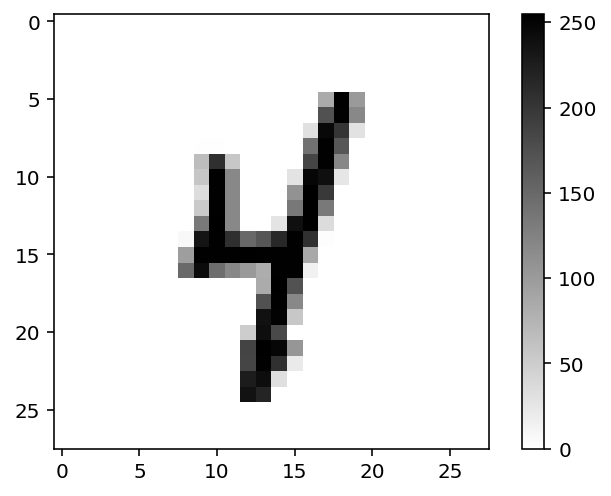

The label of this image is: 4


In [71]:
for image, label in training_set.take(1):
    image = image.numpy().squeeze()
    label = label.numpy()
    
# Plot the image
plt.imshow(image, cmap = plt.cm.binary)
plt.colorbar()
plt.show()

print('The label of this image is:', label)

In [72]:
def normalize(image, label):
    image = tf.cast(image, tf.float32)
    image /= 255
    return image, label

num_training_examples = dataset_info.splits['train'].num_examples

batch_size = 64

training_batches = training_set.cache().shuffle(num_training_examples//4).batch(batch_size).map(normalize).prefetch(1)

In [73]:
model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape = (28, 28, 1)),
        tf.keras.layers.Dense(128, activation = 'relu'),
        tf.keras.layers.Dense(64, activation = 'relu'),
        tf.keras.layers.Dense(10, activation = 'softmax')
])

In [74]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [75]:
for image_batch, label_batch in training_batches.take(1):
    loss, accuracy = model.evaluate(image_batch, label_batch)

print('\nLoss before training: {:,.3f}'.format(loss))
print('Accuracy before training: {:.3%}'.format(accuracy))

2/2 [==============================] - 0s 3ms/step - loss: 2.2908 - accuracy: 0.1406

Loss before training: 2.291
Accuracy before training: 14.062%


In [76]:
EPOCHS = 5

history = model.fit(training_batches, epochs = EPOCHS)

Epoch 1/5
938/938 [==============================] - 10s 10ms/step - loss: 0.2806 - accuracy: 0.9194
Epoch 2/5
938/938 [==============================] - 3s 3ms/step - loss: 0.1123 - accuracy: 0.9670
Epoch 3/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0759 - accuracy: 0.9767
Epoch 4/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0597 - accuracy: 0.9815
Epoch 5/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0478 - accuracy: 0.9852


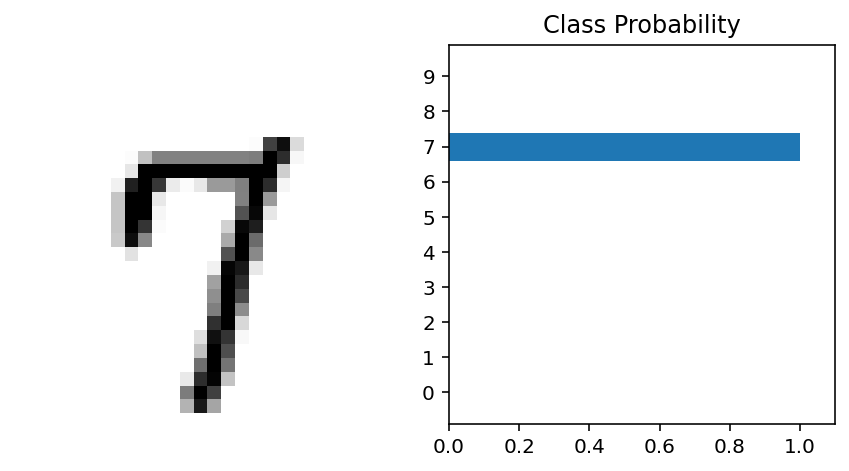

In [77]:
for image_batch, label_batch in training_batches.take(1):
    ps = model.predict(image_batch)
    first_image = image_batch.numpy().squeeze()[0]
  
  
fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
ax1.imshow(first_image, cmap = plt.cm.binary)
ax1.axis('off')
ax2.barh(np.arange(10), ps[0])
ax2.set_aspect(0.1)
ax2.set_yticks(np.arange(10))
ax2.set_yticklabels(np.arange(10))
ax2.set_title('Class Probability')
ax2.set_xlim(0, 1.1)
plt.tight_layout()


In [26]:
from tensorflow import keras
(train_images, train_labels), (test_images, test_labels) =  keras.datasets.mnist.load_data()
# backup
#(train_images2, train_labels2), (test_images2, test_labels2) = keras.datasets.mnist.load_data()

print("train_images shape : ", train_images.shape)
print("train_labels shape : ", train_labels.shape)
print("test_images shape : ", test_images.shape)
print("test_labels shape : ", test_labels.shape)

11493376/11490434 [==============================] - 0s 0us/step
train_images shape :  (60000, 28, 28)
train_labels shape :  (60000,)
test_images shape :  (10000, 28, 28)
test_labels shape :  (10000,)


In [82]:
train_images  = train_images / 255.0
test_images = test_images / 255.0

In [83]:
import numpy as np
predictions = model.predict(test_images)

predictions2 = [ np.argmax(p) for p in predictions]

In [84]:
from sklearn.metrics import classification_report
from pprint import pprint

pprint(classification_report(test_labels, predictions2, output_dict=True))

{'0': {'f1-score': 0.9836901121304792,
       'precision': 0.9826883910386965,
       'recall': 0.9846938775510204,
       'support': 980},
 '1': {'f1-score': 0.9849157054125999,
       'precision': 0.9919571045576407,
       'recall': 0.9779735682819384,
       'support': 1135},
 '2': {'f1-score': 0.9762941461054668,
       'precision': 0.9748792270531401,
       'recall': 0.9777131782945736,
       'support': 1032},
 '3': {'f1-score': 0.9688273132112815,
       'precision': 0.9683481701285855,
       'recall': 0.9693069306930693,
       'support': 1010},
 '4': {'f1-score': 0.9800102511532547,
       'precision': 0.9865841073271414,
       'recall': 0.9735234215885947,
       'support': 982},
 '5': {'f1-score': 0.9718468468468469,
       'precision': 0.9762443438914027,
       'recall': 0.9674887892376681,
       'support': 892},
 '6': {'f1-score': 0.9848721961398017,
       'precision': 0.9843587069864442,
       'recall': 0.9853862212943633,
       'support': 958},
 '7': {'f1-score'